IMAGE QUANTIZATION PROJECT
**JANVI SONI** -ROLL NO 17




IMPORTING LIBRARIES

In [ ]:
import numpy as np
import sys
import matplotlib.pyplot as plt  #for comparing mse b/w original and compressed image
from skimage import io  #to read image
from PIL import Image   # to import the image module from the pillow and call the Image. open(), passing the image filename
from sklearn.metrics import pairwise_distances_argmin  #Compute minimum distances between one point and a set of points.
from operator import add   #used in calculation for updating cluster centroids

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sunsetpic.jpeg to sunsetpic.jpeg


In [ ]:
readImg= io.imread("sunsetpic.jpeg")
print(readImg.dtype )   #checking the type to avoid the errors caused by invalid datatype,which is Unsigned Integers of 8 bits as colors are always non negative

uint8


ANALYZING THE IMAGE'S ROWS,COLOUMNS,CHANNELS(colors)

In [ ]:
img= np.array(readImg, dtype= np.float64)
h,w,d= img.shape
print(h, w, d)

353 472 3


In [ ]:
class quantization:
    
    
    def __init__(self, imagetobecompressed, bits):  #image and size of codebook is passed to constructor
        self.image = Image.open(imagetobecompressed)
        self.bits = bits
        self.pixelVector() #for converting the image into pixel vector
    
  
    
    #Image's shape is  353×472×3  which means  height×width×channels  (always 3 for RBG color images).
    #We need to rescale the array of image (whose range between 0 and 255) to (0,1) and then reshape it into  166616×3  ( 166616=353×472 ) array so that each row represents 
    #a pixel and the three columns represent the Red, Green, and Blue values.
    def pixelVector(self):
        img_arr = np.array(self.image)
        w, h, d = img_arr.shape
        self.image_shape = img_arr.shape
        self.N = w * h
        self.pixelVector= img_arr.reshape((w * h), d)
        

    #Building the required codebook (4 bit,8 bit,12 bit)
    def buildCodebook(self, n_iter = 1):
        size = 2 ** self.bits #size of codebook
        
        #fetching random samples and randomly initialzing the codebook
        self.codebook = np.random.randint(255, size = size * 3, dtype = 'uint8').reshape(size, 3)
  

        while n_iter != 0:
            #assigning cluster to each pixel
            labels = pairwise_distances_argmin(self.pixelVector,
                                              self.codebook)


            #updating cluster centroids
            for i in range(size):
                centroid_i_sum = [0, 0, 0]
                cnt = 0
                for j in range(self.N):
                    if labels[j] == i:
                        centroid_i_sum = list(map(add, centroid_i_sum, self.pixelVector[j]))
                        cnt += 1

                if cnt != 0:
                    centroid_i = np.array(centroid_i_sum) / cnt
                    self.codebook[i] = centroid_i
            n_iter -= 1


    
    #get the label for each pixel in the original image using codebook
    def compress(self):
        self.labelVector = pairwise_distances_argmin(self.pixelVector,
                                          self.codebook)

    #reconstruct image using codebook and labels assigned
    def compress_image(self):
        self.ImageVector = self.codebook[self.labelVector]
        self.compressed_image = Image.fromarray(self.ImageVector.reshape(self.image_shape))

# ***1. Quantization of picture of an outdoor location***

4 bit quantization

In [ ]:
img_quant = quantization('sunsetpic.jpeg', 4)
img_quant.buildCodebook(n_iter = 1)
img_quant.compress()#4 bit
img_quant.compress_image()

ORIGINAL IMAGE


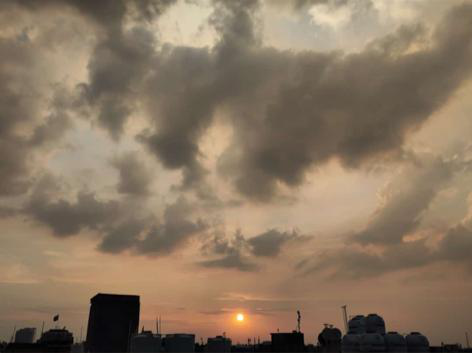

In [ ]:
print('ORIGINAL IMAGE')
img_quant.image

QUANTIZED IMAGE


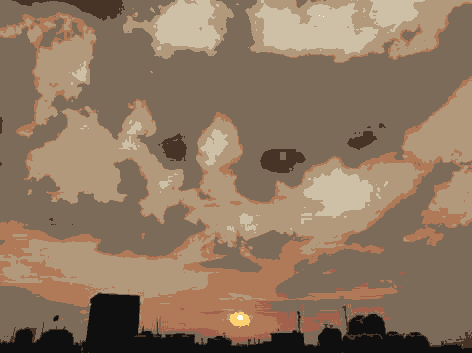

In [ ]:
print('QUANTIZED IMAGE')
img_quant.compressed_image  #4 bits

In [ ]:
original = readImg
compressed = img_quant.compressed_image
mse_4bit = (np.mean((original - compressed) ** 2))   
mse_4bit

79.16986363854612

8 bit quantization

In [ ]:
img_quant = quantization('sunsetpic.jpeg', 8)
img_quant.buildCodebook(n_iter = 1)
img_quant.compress()
print('Size of codebook(in bytes): ', img_quant.codebook.size)
print('Size of compressed image(in bytes): ', img_quant.labelVector.size)  
img_quant.compress_image()

Size of codebook(in bytes):  768
Size of compressed image(in bytes):  166616


QUANTIZED IMAGE


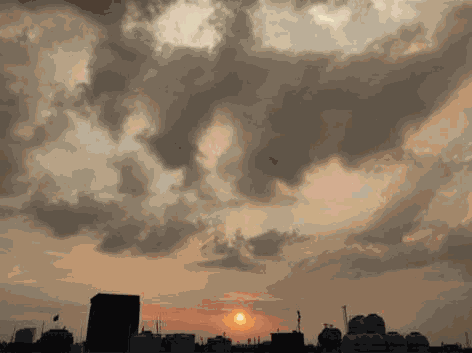

In [ ]:
print('QUANTIZED IMAGE')
img_quant.compressed_image  

In [ ]:
original = readImg
compressed = img_quant.compressed_image
mse_8bit = (np.mean((original - compressed) ** 2))   
mse_8bit

28.359843392391287

12 bit quantization

In [ ]:
img_quant = quantization('sunsetpic.jpeg', 12)
img_quant.buildCodebook(n_iter = 1)
img_quant.compress()
print('Size of codebook(in bytes): ', img_quant.codebook.size)
print('Size of compressed image(in bytes): ', img_quant.labelVector.size)
img_quant.compress_image()

Size of codebook(in bytes):  12288
Size of compressed image(in bytes):  166616


QUANTIZED IMAGE


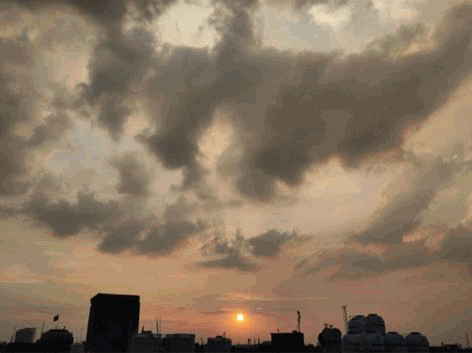

In [ ]:
print('QUANTIZED IMAGE')
img_quant.compressed_image   

In [ ]:
original = readImg
compressed = img_quant.compressed_image
mse_12bit = (np.mean((original - compressed) ** 2))   
mse_12bit

8.494534338438886

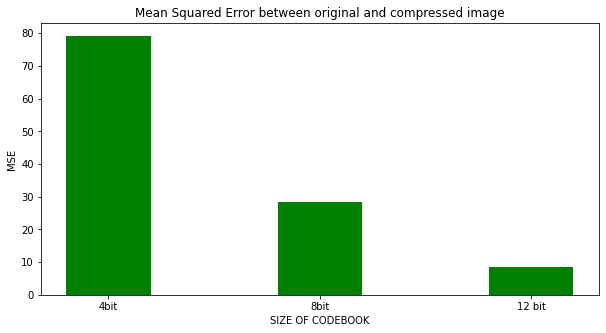

In [ ]:
# creating the dataset
data = {'4bit':mse_4bit, '8bit':mse_8bit, '12 bit':mse_12bit}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.4)
 
plt.xlabel("SIZE OF CODEBOOK")
plt.ylabel("MSE")
plt.title("Mean Squared Error between original and compressed image")
plt.show()

# ***2. Quantization of picture of an object on the wall of home***

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pic.jpg to pic.jpg


In [ ]:
readImg= io.imread("pic.jpg")
print(readImg.dtype )   #checking the type to avoid the errors caused by invalid datatype,which is Unsigned Integers of 8 bits as colors are always non negative

uint8


ANALYZING THE IMAGE'S ROWS,COLOUMNS,CHANNELS

In [ ]:
img= np.array(readImg, dtype= np.float64)
h,w,d= img.shape
print(h, w, d)

237 600 3


4 bit quantization

In [ ]:
img_quant = quantization('pic.jpg', 4)
img_quant.buildCodebook(n_iter = 1)
img_quant.compress()
print('Size of codebook(in bytes): ', img_quant.codebook.size)
print('Size of compressed image(in bytes): ', img_quant.labelVector.size)  #4 bit
img_quant.compress_image()

Size of codebook(in bytes):  48
Size of compressed image(in bytes):  142200


Original image


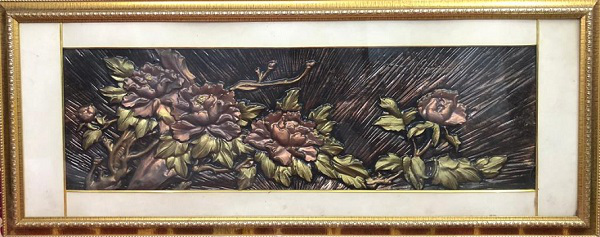

In [ ]:
print('Original image')
img_quant.image

COMPRESSED IMAGE


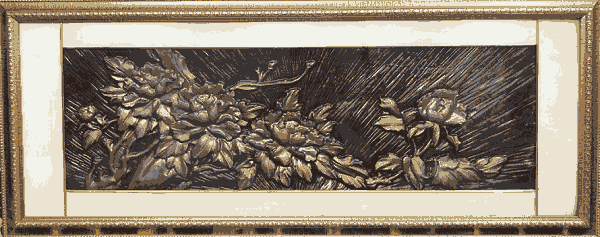

In [ ]:
print('COMPRESSED IMAGE')
img_quant.compressed_image  #4 bits

In [ ]:
original = readImg
compressed = img_quant.compressed_image
mse_4bit = (np.mean((original - compressed) ** 2))   
mse_4bit

67.4118190342241

8 bit quantization

In [ ]:
img_quant = quantization('pic.jpg', 8)
img_quant.buildCodebook(n_iter = 1)
img_quant.compress()
print('Size of codebook(in bytes): ', img_quant.codebook.size)
print('Size of compressed image(in bytes): ', img_quant.labelVector.size)  
img_quant.compress_image()

Size of codebook(in bytes):  768
Size of compressed image(in bytes):  142200


COMPRESSED IMAGE


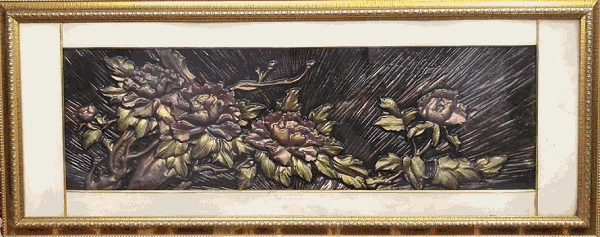

In [ ]:
print('COMPRESSED IMAGE')
img_quant.compressed_image  #8bit

In [ ]:
original = readImg
compressed = img_quant.compressed_image
mse_8bit = (np.mean((original - compressed) ** 2))   
mse_8bit

43.917140178152835

12 bit quantization

In [ ]:
img_quant = quantization('pic.jpg', 12)
img_quant.buildCodebook(n_iter = 1)
img_quant.compress()
print('Size of codebook(in bytes): ', img_quant.codebook.size)
print('Size of compressed image(in bytes): ', img_quant.labelVector.size)
img_quant.compress_image()

Size of codebook(in bytes):  12288
Size of compressed image(in bytes):  142200


COMPRESSED IMAGE


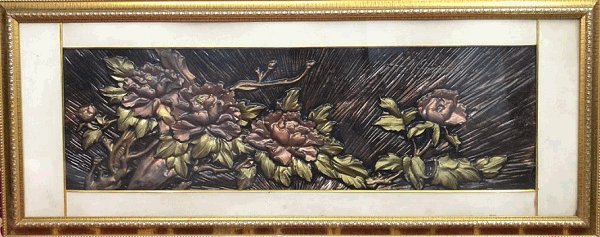

In [ ]:
print('COMPRESSED IMAGE')
img_quant.compressed_image   #12 bit

In [ ]:
original = readImg
compressed = img_quant.compressed_image
mse_12bit = (np.mean((original - compressed) ** 2))   
mse_12bit

12.397714486638538

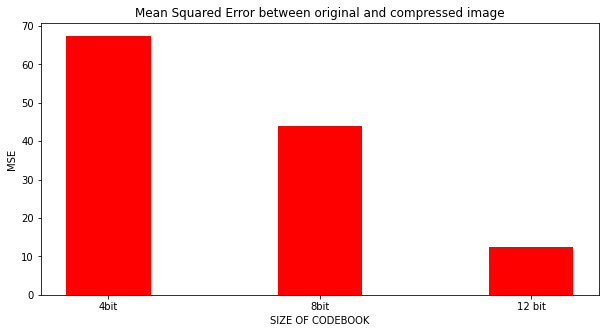

In [ ]:
# creating the dataset
data = {'4bit':mse_4bit, '8bit':mse_8bit, '12 bit':mse_12bit}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='red',
        width = 0.4)
 
plt.xlabel("SIZE OF CODEBOOK")
plt.ylabel("MSE")
plt.title("Mean Squared Error between original and compressed image")
plt.show()